In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import os
import cv2

In [ ]:
(x_train,y_train),(x_test,y_test)= keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train_gray = np.array([cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) for img in x_train])
x_test_gray = np.array([cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) for img in x_test])

In [ ]:
x_train_gray = np.expand_dims(x_train_gray,axis=-1)
x_test_gray = np.expand_dims(x_test_gray,axis=-1)

In [ ]:
x_train_gray = tf.image.resize(x_train_gray,(64,64))
x_test_gray = tf.image.resize(x_test_gray,(64,64))

In [ ]:
y_train_color = x_train
y_test_color  = x_test

y_train_color = tf.image.resize(y_train_color,(64,64))
y_test_color = tf.image.resize(y_test_color,(64,64))

y_train_color = y_train_color.numpy()
y_test_color = y_test_color.numpy()

In [ ]:
input_img = keras.layers.Input(shape=(64,64,1))

x = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(input_img)
x_i = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
y =  keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=2)(x)


x2 = keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(y)
x_new = keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(x2)

x3 = keras.layers.UpSampling2D((2,2))(x2)
x4 = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(x3)
x5 = keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(x4)

output_img = keras.layers.Conv2D(3,(3,3),activation='sigmoid',padding='same')(x4)


model = Model(inputs=input_img ,outputs=output_img)


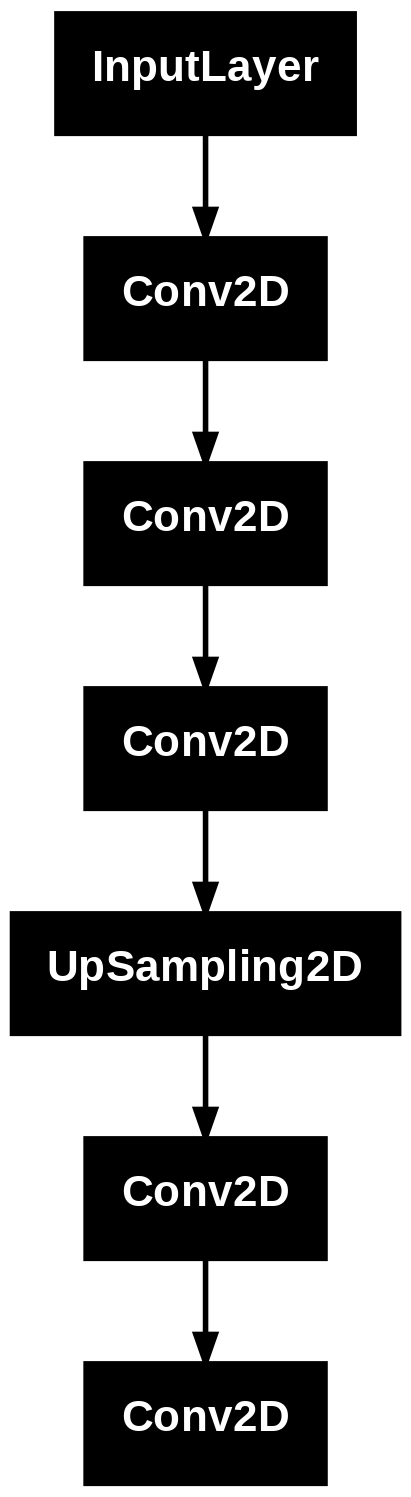

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,947 (730.26 KB)

 Trainable params: 186,947 (730.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_history = model.fit(x_train_gray,y_train_color,epochs=20,batch_size=32,validation_data=(x_test_gray,y_test_color))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.4246 - loss: 0.0093 - val_accuracy: 0.4469 - val_loss: 0.0058
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4508 - loss: 0.0058 - val_accuracy: 0.4442 - val_loss: 0.0058
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4748 - loss: 0.0056 - val_accuracy: 0.4949 - val_loss: 0.0055
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4879 - loss: 0.0055 - val_accuracy: 0.4766 - val_loss: 0.0054
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4867 - loss: 0.0055 - val_accuracy: 0.4961 - val_loss: 0.0054
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4897 - loss: 0.0054 - val_accuracy: 0.4851 - val_loss: 0.0053
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4924 - loss: 0.0053 - val_accuracy: 0.5044 - val_loss: 0.0053
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4967 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


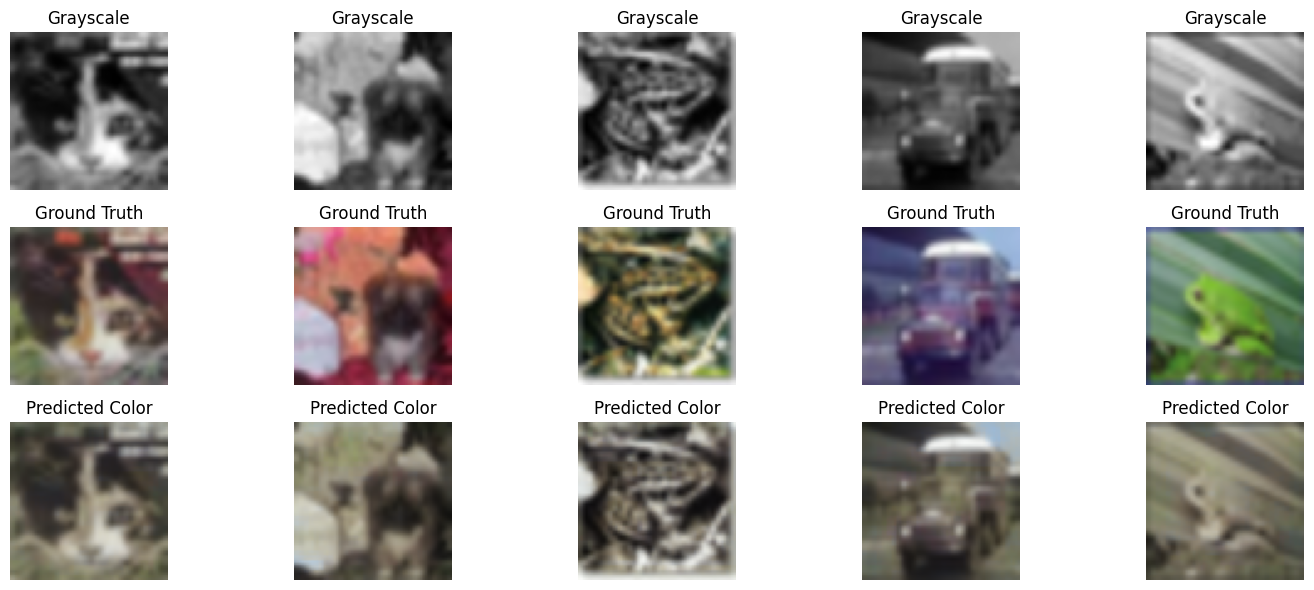

In [ ]:
num_images_to_predict = 5
sample_indices = np.random.choice(len(x_test_gray), num_images_to_predict, replace=False)

# Convert NumPy array of indices to a TensorFlow tensor
sample_indices_tf = tf.constant(sample_indices, dtype=tf.int32)

# Use tf.gather to select elements from the EagerTensor
sample_gray_images = tf.gather(x_test_gray, sample_indices_tf)
sample_color_ground_truth = y_test_color[sample_indices]

predicted_color_images = model.predict(sample_gray_images)


plt.figure(figsize=(15, 6))
for i in range(num_images_to_predict):

    ax = plt.subplot(3, num_images_to_predict, i + 1)
    plt.imshow(sample_gray_images[i][:,:,0], cmap='gray')
    plt.title("Grayscale")
    plt.axis("off")


    ax = plt.subplot(3, num_images_to_predict, i + 1 + num_images_to_predict)
    plt.imshow(sample_color_ground_truth[i])
    plt.title("Ground Truth")
    plt.axis("off")


    ax = plt.subplot(3, num_images_to_predict, i + 1 + 2 * num_images_to_predict)
    plt.imshow(predicted_color_images[i])
    plt.title("Predicted Color")
    plt.axis("off")

plt.tight_layout()
plt.show()